In [1]:
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr


def density_plot_PM(df,station,var):
    df_1 = df.loc[df.TM_90 == 1]
    df_0 = df.loc[df.TM_90 == 0]
    mean_1 = np.mean(df_1[var])
    mean_0 = np.mean(df_0[var])
    print(mean_1)
    print(mean_0)
    sns.axes_style("ticks")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(df_1[var], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'Blocked Days')
    sns.distplot(df_0[var], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'Not Blocked')
    plt.title(f'Density Plot Blocking/PM2.5', fontsize =30)
    plt.xlabel('PM2.5/ ' + '\u03BC' + 'g$m^{-3}$', fontsize = 20)
    plt.ylabel('Density', fontsize = 20)
    plt.vlines(mean_1,0,0.09, colors = 'blue', label = 'Blocked Mean', linestyles='dashed')
    plt.vlines(mean_0,0,0.09, color = 'orange', label = 'Unblocked Mean', linestyles='dashed' )
    plt.ylim([0,0.09])
    plt.xlim([-5,60])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(prop={'size': 25}, loc= 'upper right')
    sns.despine()
    #plt.savefig('PM_density_plot_blo_final2.png')
    plt.show()

def density_o3(df,station):
    df_1 = df.loc[df.TM_90 == 1]
    df_0 = df.loc[df.TM_90 == 0]
    print(len(df_1))
    print(len(df_0))
    mean_1 = np.mean(df_1['o3'])
    mean_0 = np.mean(df_0['o3'])
    sns.axes_style("ticks")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(df_1['o3'], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'Blocked Days')
    sns.distplot(df_0['o3'], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'Not Blocked')
    plt.title(f'Density Plot with Varyied Blocking, {station}', fontsize =20)
    plt.xlabel('o3/ ' + '\u03BC' + 'g$m^{-3}$', fontsize = 20)
    plt.ylabel('Density', fontsize = 20)
    plt.vlines(mean_1,0,0.06, colors = 'blue', label = 'Blocked Mean', linestyles='dashed')
    plt.vlines(mean_0,0,0.06, color = 'orange', label = 'Unblocked Mean', linestyles='dashed' )
    plt.xlim([-5,60])
    plt.ylim([0,0.06])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(prop={'size': 16}, title = 'Blocking')
    sns.despine()
    #plt.savefig('Extended_o3_data_density_plot_blocking.png')
    plt.show()
    
def density_plot_PM_NAO(df,station,var):
    df_1 = df.loc[df.NAO_PC > 1]
    df_0 = df.loc[(df.NAO_PC < 1) & (df.NAO_PC >-1)]
    df_11 = df.loc[(df.NAO_PC < -1)]
    mean_1 = np.mean(df_1[var])
    mean_0 = np.mean(df_0[var])
    mean_11 = np.mean(df_11[var])
    print(mean_1)
    print(mean_0)
    print(mean_11)
    sns.axes_style("ticks")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(df_1[var], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'NAO+')
    sns.distplot(df_0[var], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'Intermediate NAO')
    sns.distplot(df_11[var], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'NAO-')
    plt.title(f'Density Plot NAO/PM2.5', fontsize =30)
    plt.xlabel('PM2.5/ ' + '\u03BC' + 'g$m^{-3}$', fontsize = 20)
    plt.ylabel('Density', fontsize = 20)
    plt.vlines(mean_1,0,0.16, colors = 'blue', label = 'NAO+ Mean', linestyles='dashed')
    plt.vlines(mean_0,0,0.16, color = 'orange', label = 'Intermediate Mean', linestyles='dashed' )
    plt.vlines(mean_11,0,0.16, color = 'green', label = 'NAO- Mean', linestyles='dashed' )
    plt.ylim([0,0.16])
    plt.xlim([-5,60])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(prop={'size': 25}, loc = 'upper right')
    sns.despine()
    #plt.savefig('PM_density_plot_NAO_final1.png')
    plt.show()

In [2]:
df = pd.read_pickle('all_stations.pkl')

In [53]:
!pip install netcdf4

In [54]:
!pip install h5netcdf

In [3]:
atmos_block = xr.open_dataset('atmospheric_blocking.nc')

In [4]:
atmos_block

<xarray.Dataset>
Dimensions:          (t: 3430, lat: 31, lon: 21)
Coordinates:
  * t                (t) datetime64[ns] 1979-12-01 1979-12-02 ... 2017-02-28
  * lat              (lat) float64 15.0 17.5 20.0 22.5 ... 82.5 85.0 87.5 90.0
  * lon              (lon) float64 -10.0 -7.5 -5.0 -2.5 ... 32.5 35.0 37.5 40.0
Data variables:
    TM90_grid_index  (t, lat, lon) float64 ...

In [11]:
[atmos_block.TM90_grid_index == 1]

[<xarray.DataArray 'TM90_grid_index' (t: 3430, lat: 31, lon: 21)>
 array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
 ...
         ..

In [12]:
df

,level_0,totprecip_datetime,totprecip,lat,lon,alt,pop_density,station_type,land_cover,nox_emi,...,cloudcover,relhum,press,temp,v,u,pblheight,area_type,NAO_PC,TM_90
0,0,1997-01-09,0.027953,51.579998,-3.761678,88.0,4558.0,industrial,13.0,5.12153,...,71.289208,82.606250,999.750000,-1.204167,-0.277348,-3.136583,607.425000,urban,-0.793226,0
1,1,1997-01-10,0.011291,51.579998,-3.761678,88.0,4558.0,industrial,13.0,5.12153,...,85.267917,83.952917,1007.500000,-0.200000,2.842017,-5.206875,465.337500,urban,-1.071230,0
2,2,1997-01-11,0.500242,51.579998,-3.761678,88.0,4558.0,industrial,13.0,5.12153,...,100.000000,96.352500,1009.291667,6.500000,2.501167,-3.443125,252.375000,urban,-1.073248,0
3,3,1997-01-12,0.000000,51.579998,-3.761678,88.0,4558.0,industrial,13.0,5.12153,...,99.370833,94.991667,1012.541667,8.758333,3.355375,0.977583,459.933333,urban,-0.209224,0
4,4,1997-01-13,0.000000,51.579998,-3.761678,88.0,4558.0,industrial,13.0,5.12153,...,67.439583,77.385833,1011.375000,7.804167,2.228042,-2.155917,214.750000,urban,0.649706,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,397,2001-12-27,0.574076,55.951946,-3.194175,40.0,74745.0,background,13.0,13.24780,...,91.071292,87.344583,992.916667,4.508333,0.049678,1.706167,684.170833,urban,-0.140250,0
32556,398,2001-12-28,0.000000,55.951946,-3.194175,40.0,74745.0,background,13.0,13.24780,...,56.136042,67.893333,992.666667,2.429167,-2.973433,5.611583,1175.687500,urban,-0.515749,0
32557,399,2001-12-29,0.000000,55.951946,-3.194175,40.0,74745.0,background,13.0,13.24780,...,46.476333,84.239583,998.208333,-1.404167,-0.285666,3.555125,417.138333,urban,-0.744150,0
32558,400,2001-12-30,0.000000,55.951946,-3.194175,40.0,74745.0,background,13.0,13.24780,...,37.003667,84.020833,1012.708333,-1.495833,-1.573579,2.114500,281.416667,urban,-1.013107,0


In [46]:
df

,level_0,totprecip_datetime,totprecip,lat,lon,alt,pop_density,station_type,land_cover,nox_emi,...,cloudcover,relhum,press,temp,v,u,pblheight,area_type,NAO_PC,TM_90
0,0,1997-01-09,0.027953,51.579998,-3.761678,88.0,4558.0,industrial,13.0,5.12153,...,71.289208,82.606250,999.750000,-1.204167,-0.277348,-3.136583,607.425000,urban,-0.793226,0
1,1,1997-01-10,0.011291,51.579998,-3.761678,88.0,4558.0,industrial,13.0,5.12153,...,85.267917,83.952917,1007.500000,-0.200000,2.842017,-5.206875,465.337500,urban,-1.071230,0
2,2,1997-01-11,0.500242,51.579998,-3.761678,88.0,4558.0,industrial,13.0,5.12153,...,100.000000,96.352500,1009.291667,6.500000,2.501167,-3.443125,252.375000,urban,-1.073248,0
3,3,1997-01-12,0.000000,51.579998,-3.761678,88.0,4558.0,industrial,13.0,5.12153,...,99.370833,94.991667,1012.541667,8.758333,3.355375,0.977583,459.933333,urban,-0.209224,0
4,4,1997-01-13,0.000000,51.579998,-3.761678,88.0,4558.0,industrial,13.0,5.12153,...,67.439583,77.385833,1011.375000,7.804167,2.228042,-2.155917,214.750000,urban,0.649706,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,397,2001-12-27,0.574076,55.951946,-3.194175,40.0,74745.0,background,13.0,13.24780,...,91.071292,87.344583,992.916667,4.508333,0.049678,1.706167,684.170833,urban,-0.140250,0
32556,398,2001-12-28,0.000000,55.951946,-3.194175,40.0,74745.0,background,13.0,13.24780,...,56.136042,67.893333,992.666667,2.429167,-2.973433,5.611583,1175.687500,urban,-0.515749,0
32557,399,2001-12-29,0.000000,55.951946,-3.194175,40.0,74745.0,background,13.0,13.24780,...,46.476333,84.239583,998.208333,-1.404167,-0.285666,3.555125,417.138333,urban,-0.744150,0
32558,400,2001-12-30,0.000000,55.951946,-3.194175,40.0,74745.0,background,13.0,13.24780,...,37.003667,84.020833,1012.708333,-1.495833,-1.573579,2.114500,281.416667,urban,-1.013107,0


In [2]:
df = pd.read_pickle('all_urban_new_data.pkl')

In [3]:
df

,index,o3_datetime,station_name,lat,lon,area_type,o3,units,TM_90
0,10594,2015-01-01,ABERDEEN,57.157360,-2.094278,urban,34.617200,µg/m3,0
1,10595,2015-01-02,ABERDEEN,57.157360,-2.094278,urban,39.223137,µg/m3,0
2,10596,2015-01-03,ABERDEEN,57.157360,-2.094278,urban,33.457725,µg/m3,0
3,10597,2015-01-04,ABERDEEN,57.157360,-2.094278,urban,30.957975,µg/m3,0
4,10598,2015-01-05,ABERDEEN,57.157360,-2.094278,urban,25.021650,µg/m3,0
...,...,...,...,...,...,...,...,...,...
242815,544681,2017-12-27,Coventry Allesley,52.411563,-1.560228,urban,34.833175,µg/m3,0
242816,544682,2017-12-28,Coventry Allesley,52.411563,-1.560228,urban,21.925863,µg/m3,0
242817,544683,2017-12-29,Coventry Allesley,52.411563,-1.560228,urban,35.749125,µg/m3,0
242818,544684,2017-12-30,Coventry Allesley,52.411563,-1.560228,urban,36.564988,µg/m3,0


In [4]:
import folium

In [6]:
li = list(df['station_name'].unique())

In [7]:
m = folium.Map(location=[54.5236, -2.6750], zoom_start = 5)

for i in li:
    #print(i)
    #print(list_off[3][-200:-11])
    #print(temp_df['lat'].iloc[0])
    #print(temp_df['lon'].iloc[0])
    folium.Marker(location=[df[df['station_name']==i]['lat'].iloc[0], 
                            df[df['station_name']==i]['lon'].iloc[0]], 
                  popup=i, 
                  icon=folium.Icon(icon="info-sign")).add_to(m)

In [8]:
m

In [14]:
# do we have summer days too?

df.o3_datetime.unique()[100:350]

array(['2015-05-16', '2015-05-17', '2015-05-18', '2015-05-19',
       '2015-05-20', '2015-05-21', '2015-05-22', '2015-05-23',
       '2015-05-24', '2015-05-25', '2015-05-26', '2015-05-27',
       '2015-05-28', '2015-05-29', '2015-05-30', '2015-05-31',
       '2015-06-01', '2015-06-02', '2015-06-03', '2015-06-04',
       '2015-06-05', '2015-06-06', '2015-06-07', '2015-06-08',
       '2015-06-09', '2015-06-10', '2015-06-11', '2015-06-12',
       '2015-06-13', '2015-06-14', '2015-06-15', '2015-06-16',
       '2015-06-17', '2015-06-18', '2015-06-19', '2015-06-20',
       '2015-06-21', '2015-06-22', '2015-06-23', '2015-06-24',
       '2015-06-25', '2015-06-26', '2015-06-27', '2015-06-28',
       '2015-06-29', '2015-06-30', '2015-07-01', '2015-07-02',
       '2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14',
       '2015-07-15', '2015-07-17', '2015-07-18', '2015-

In [15]:
# let's read in all our data, with env too

### Reading in the new data scraped from TOAR here. This new scrape contains data
### outside the previously scraped data.

raw_data = pd.read_csv('/home/jovyan/lustre_scratch/cas/european_data_new_temp/merged_euro_clean/uk_france_italy_o3_fewer_400_dropped_reindex_drop_cols.csv')

# we then select the rows that we were able to use in training due to memory problems.

#data = raw_data[0:1532778]  


In [41]:
guess = pd.read_pickle('/home/jovyan/blocking_nao/Final analysis/all_pm25_TM_PC.pkl')

In [42]:
# this is PM2.5

guess

,Date,lat,lon,day_mean,station_name,TM_90,NAO_PC
25,02-12-2016,52.4862,-1.8904,21.891667,Birmingham,0,-1.228157
26,03-12-2016,52.4862,-1.8904,11.445833,Birmingham,0,-1.031492
27,04-12-2016,52.4862,-1.8904,14.491667,Birmingham,0,-0.963764
28,05-12-2016,52.4862,-1.8904,44.416667,Birmingham,0,-0.903836
29,06-12-2016,52.4862,-1.8904,45.237500,Birmingham,0,-0.622052
...,...,...,...,...,...,...,...
14303,27-12-2017,53.4808,-2.2426,4.808333,Manchester,0,0.440512
14304,28-12-2017,53.4808,-2.2426,7.541667,Manchester,0,0.601481
14305,29-12-2017,53.4808,-2.2426,7.195833,Manchester,0,0.912424
14306,30-12-2017,53.4808,-2.2426,5.112500,Manchester,0,1.259903


In [16]:
raw_data

,datetime,o3,station_name,alt,station_etopo_alt,station_rel_etopo_alt,station_type,landcover,toar_category,pop_density,...,nox_emi,omi_nox,temp,press,u,v,pblheight,relhum,cloudcover,time_idx
0,2004-01-01,35.588063,ABERDEEN,5.0,21.0,21.0,background,13.0,3.0,49081.0,...,5.58598,1.80,3.195833,994.475000,2.621792,0.232750,640.948333,90.354583,99.700000,996713
1,2004-01-02,36.214613,ABERDEEN,5.0,21.0,21.0,background,13.0,3.0,49081.0,...,5.58598,1.80,2.916667,1013.333333,2.003333,-0.130875,453.892083,88.965417,98.463750,996714
2,2004-01-03,32.956513,ABERDEEN,5.0,21.0,21.0,background,13.0,3.0,49081.0,...,5.58598,1.80,4.416667,1007.125000,3.616833,0.145500,812.766667,89.084167,95.205833,996715
3,2004-01-04,33.457750,ABERDEEN,5.0,21.0,21.0,background,13.0,3.0,49081.0,...,5.58598,1.80,3.608333,1009.333333,1.545833,-0.169125,201.668750,91.235000,99.543333,996716
4,2004-01-05,14.410655,ABERDEEN,5.0,21.0,21.0,background,13.0,3.0,49081.0,...,5.58598,1.80,6.758333,999.858333,2.052625,3.092708,503.145250,94.327083,98.989167,996717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869422,2012-11-26,19.360400,viale La Plaja 2009235,3.0,1.0,1.0,traffic,13.0,0.0,215.0,...,8.54064,1.57,17.283333,1016.416667,-2.855062,2.077470,507.762500,78.645000,34.774750,999996
2869423,2012-11-27,13.658798,viale La Plaja 2009235,3.0,1.0,1.0,traffic,13.0,0.0,215.0,...,8.54064,1.57,17.975000,1005.825000,-0.627479,2.807800,601.885000,78.806250,99.502083,999997
2869424,2012-11-28,15.914375,viale La Plaja 2009235,3.0,1.0,1.0,traffic,13.0,0.0,215.0,...,8.54064,1.57,13.662500,994.812500,6.595833,1.037817,1284.587500,73.621250,100.000000,999998
2869425,2012-11-29,12.844275,viale La Plaja 2009235,3.0,1.0,1.0,traffic,13.0,0.0,215.0,...,8.54064,1.57,12.675000,996.820833,9.165250,-3.130608,1639.762500,69.458333,67.676708,999999


In [21]:
df['datetime'] = df['o3_datetime']

In [23]:
df

,index,o3_datetime,station_name,lat,lon,area_type,o3,units,TM_90,datetime
0,10594,2015-01-01,ABERDEEN,57.157360,-2.094278,urban,34.617200,µg/m3,0,2015-01-01
1,10595,2015-01-02,ABERDEEN,57.157360,-2.094278,urban,39.223137,µg/m3,0,2015-01-02
2,10596,2015-01-03,ABERDEEN,57.157360,-2.094278,urban,33.457725,µg/m3,0,2015-01-03
3,10597,2015-01-04,ABERDEEN,57.157360,-2.094278,urban,30.957975,µg/m3,0,2015-01-04
4,10598,2015-01-05,ABERDEEN,57.157360,-2.094278,urban,25.021650,µg/m3,0,2015-01-05
...,...,...,...,...,...,...,...,...,...,...
242815,544681,2017-12-27,Coventry Allesley,52.411563,-1.560228,urban,34.833175,µg/m3,0,2017-12-27
242816,544682,2017-12-28,Coventry Allesley,52.411563,-1.560228,urban,21.925863,µg/m3,0,2017-12-28
242817,544683,2017-12-29,Coventry Allesley,52.411563,-1.560228,urban,35.749125,µg/m3,0,2017-12-29
242818,544684,2017-12-30,Coventry Allesley,52.411563,-1.560228,urban,36.564988,µg/m3,0,2017-12-30


In [19]:
from functools import reduce

In [27]:
#define list of DataFrames
dfs = [df, raw_data]

#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['datetime', 'station_name',],
                                            how='outer'), dfs)

#view merged DataFrame
final_df

,index,o3_datetime,station_name,lat,lon,area_type,o3_x,units,TM_90,datetime,...,nox_emi,omi_nox,temp,press,u,v,pblheight,relhum,cloudcover,time_idx
0,10594.0,2015-01-01,ABERDEEN,57.15736,-2.094278,urban,34.617200,µg/m3,0.0,2015-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10595.0,2015-01-02,ABERDEEN,57.15736,-2.094278,urban,39.223137,µg/m3,0.0,2015-01-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10596.0,2015-01-03,ABERDEEN,57.15736,-2.094278,urban,33.457725,µg/m3,0.0,2015-01-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10597.0,2015-01-04,ABERDEEN,57.15736,-2.094278,urban,30.957975,µg/m3,0.0,2015-01-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10598.0,2015-01-05,ABERDEEN,57.15736,-2.094278,urban,25.021650,µg/m3,0.0,2015-01-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961195,NaN,NaN,viale La Plaja 2009235,NaN,NaN,NaN,NaN,NaN,NaN,2012-11-26,...,8.54064,1.57,17.283333,1016.416667,-2.855062,2.077470,507.762500,78.645000,34.774750,999996.0
2961196,NaN,NaN,viale La Plaja 2009235,NaN,NaN,NaN,NaN,NaN,NaN,2012-11-27,...,8.54064,1.57,17.975000,1005.825000,-0.627479,2.807800,601.885000,78.806250,99.502083,999997.0
2961197,NaN,NaN,viale La Plaja 2009235,NaN,NaN,NaN,NaN,NaN,NaN,2012-11-28,...,8.54064,1.57,13.662500,994.812500,6.595833,1.037817,1284.587500,73.621250,100.000000,999998.0
2961198,NaN,NaN,viale La Plaja 2009235,NaN,NaN,NaN,NaN,NaN,NaN,2012-11-29,...,8.54064,1.57,12.675000,996.820833,9.165250,-3.130608,1639.762500,69.458333,67.676708,999999.0


In [32]:
final_df_dropna = final_df.dropna()

In [34]:
final_df_dropna['o3_x']

323       16.666225
324        4.385850
325        3.633990
326        5.388330
327        7.267980
            ...    
238203    22.931725
238204    19.798975
238205    15.037213
238206    21.929263
238207    13.282865
Name: o3_x, Length: 151068, dtype: float64

In [37]:
final_df_dropna

,index,o3_datetime,station_name,lat,lon,area_type,o3_x,units,TM_90,datetime,...,nox_emi,omi_nox,temp,press,u,v,pblheight,relhum,cloudcover,time_idx
323,12058.0,1997-12-17,BARNSLEY GAWBER,53.562920,-1.510436,urban,16.666225,µg/m3,0.0,1997-12-17,...,5.90532,6.71,1.212500,996.241667,-6.762542,2.324842,1032.400000,84.692500,100.000000,994507.0
324,12059.0,1997-12-18,BARNSLEY GAWBER,53.562920,-1.510436,urban,4.385850,µg/m3,0.0,1997-12-18,...,5.90532,6.71,5.308333,986.541667,-3.194917,1.790330,528.152708,96.997083,100.000000,994508.0
325,12060.0,1997-12-19,BARNSLEY GAWBER,53.562920,-1.510436,urban,3.633990,µg/m3,0.0,1997-12-19,...,5.90532,6.71,6.229167,984.879167,1.586250,-0.570788,222.673250,96.162500,100.000000,994509.0
326,12061.0,1997-12-20,BARNSLEY GAWBER,53.562920,-1.510436,urban,5.388330,µg/m3,0.0,1997-12-20,...,5.90532,6.71,6.304167,991.895833,1.164833,0.650298,131.007917,92.333333,89.755833,994510.0
327,12062.0,1997-12-21,BARNSLEY GAWBER,53.562920,-1.510436,urban,7.267980,µg/m3,0.0,1997-12-21,...,5.90532,6.71,5.070833,1001.433333,0.433583,1.062363,147.002500,95.454167,73.278667,994511.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238203,376183.0,2007-09-26,WOLVERHAMPTON CENTRE,52.588333,-2.128900,urban,22.931725,µg/m3,0.0,2007-09-26,...,17.34620,6.46,7.162500,1006.208333,-0.383051,-3.866500,874.008333,78.803750,41.784942,999996.0
238204,376184.0,2007-09-27,WOLVERHAMPTON CENTRE,52.588333,-2.128900,urban,19.798975,µg/m3,0.0,2007-09-27,...,17.34620,6.46,7.133333,1005.416667,-0.201148,-3.633083,642.575000,89.851667,83.368417,999997.0
238205,376185.0,2007-09-28,WOLVERHAMPTON CENTRE,52.588333,-2.128900,urban,15.037213,µg/m3,0.0,2007-09-28,...,17.34620,6.46,10.937500,998.620833,-2.072161,-3.316167,835.379167,88.700417,99.909583,999998.0
238206,376186.0,2007-09-29,WOLVERHAMPTON CENTRE,52.588333,-2.128900,urban,21.929263,µg/m3,0.0,2007-09-29,...,17.34620,6.46,12.054167,998.270833,-2.256514,-0.821335,531.896667,87.584583,90.699583,999999.0


In [38]:
df_blo = final_df_dropna[final_df_dropna.TM_90 == 1]
print(len(df_blo))

1780


In [40]:
100*(len(df_blo)/len(final_df_dropna))

1.1782773320623825

2432
240388


/home/jovyan/lustre_scratch/conda-envs/blocking/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/lustre_scratch/conda-envs/blocking/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


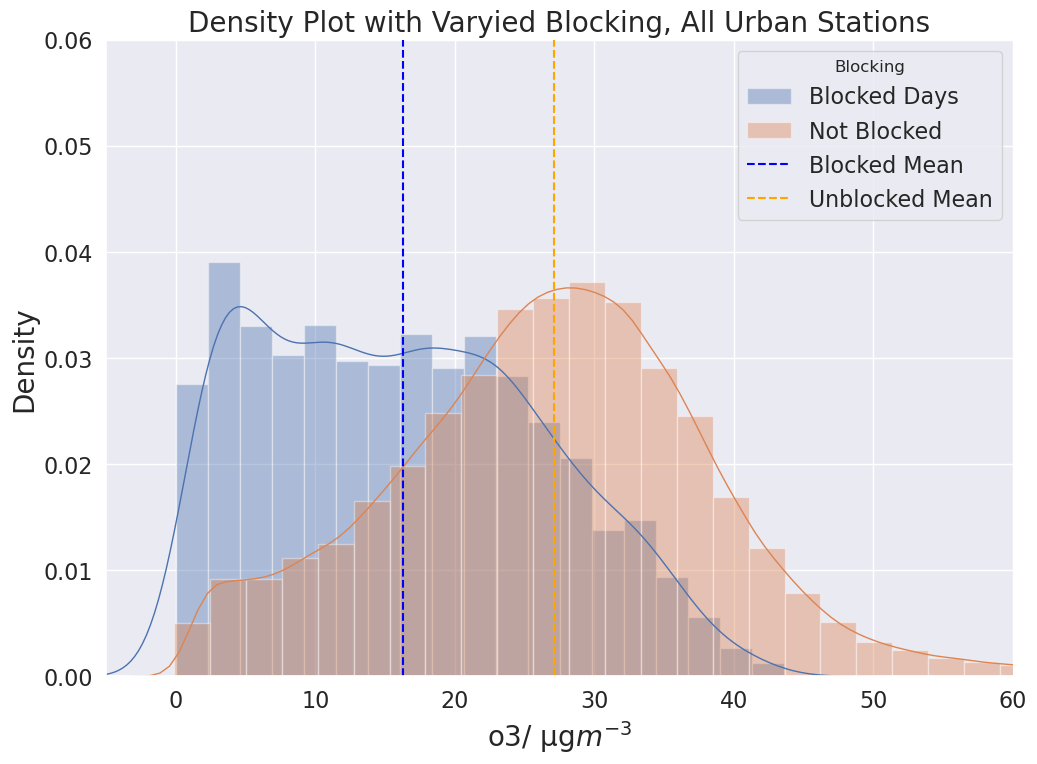

In [10]:
stations  = list(set(df['station_name']))
density_o3(df,'All Urban Stations')

In [11]:
density_plot_PM_NAO(df,'All Urban Stations','o3')

AttributeError: 'DataFrame' object has no attribute 'NAO_PC'

## PM2.5 

In [12]:
bir = pd.read_pickle('PM2.5/birmingham_pm25.pkl')
lee = pd.read_pickle('PM2.5/leeds_pm25.pkl')
lon = pd.read_pickle('PM2.5/London_pm25.pkl')
liv = pd.read_pickle('PM2.5/liverpool_pm25.pkl')
new = pd.read_pickle('PM2.5/newcastle_pm25.pkl')
gla = pd.read_pickle('PM2.5/glasgow_pm25.pkl')
man = pd.read_pickle('PM2.5/manchester_pm25.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'PM2.5/birmingham_pm25.pkl'

In [11]:
man['station_name'] = 'Manchester'
lee['station_name'] = 'Leeds'
lon['station_name'] = 'London'
bir['station_name'] = 'Birmingham'
gla['station_name'] = 'Glasgow'
new['station_name'] = 'Newcastle'
liv['station_name'] = 'Liverpool'

In [12]:
dfs = [bir,lee,lon,liv,new,gla, man]

In [13]:
df_fixed = []
for item in dfs:
    df_fixed.append(item.rename(mapper ={'   Date   ': 'Date', 'Dates': 'Date', 'PM25': 'day_mean','daymean':'day_mean'},axis = 'columns'))
    print(item.columns)
for item in df_fixed:
    print(item.columns)

Index(['   Date   ', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index(['   Date   ', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index(['Dates', 'PM25', 'lat', 'lon', 'station_name'], dtype='object')
Index(['   Date   ', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index(['   Date   ', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index(['   Date   ', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index(['   Date   ', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index(['Date', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index(['Date', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index(['Date', 'day_mean', 'lat', 'lon', 'station_name'], dtype='object')
Index(['Date', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index(['Date', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index(['Date', 'lat', 'lon', 'day_mean', 'station_name'], dtype='object')
Index

In [13]:


for item in df_fixed:
    lat = item['lat'].iloc[0]
    long = item['lon'].iloc[0]
    blocking = xr.open_dataset('atmospheric_blocking.nc').sel(lat = lat,lon= long, method = 'nearest')['TM90_grid_index']
    df_blocking = []
    dates = item['Date']
    for date in dates:
        BI = blocking.sel(t = date, method = 'Nearest').values
        if BI == 0:
            df_blocking.append(0)
        else:
            df_blocking.append(1)
    item['TM_90'] = df_blocking


    

NameError: name 'df_fixed' is not defined

In [15]:
final_df = pd.concat(df_fixed)

In [16]:
final_df

,Date,lat,lon,day_mean,station_name,TM_90
254,11-09-2016,52.4862,-1.8904,8.791667,Birmingham,0
255,12-09-2016,52.4862,-1.8904,11.325000,Birmingham,0
256,13-09-2016,52.4862,-1.8904,NaN,Birmingham,0
257,14-09-2016,52.4862,-1.8904,39.654167,Birmingham,0
258,15-09-2016,52.4862,-1.8904,48.566667,Birmingham,0
...,...,...,...,...,...,...
3282,27-12-2017,53.4808,-2.2426,4.808333,Manchester,0
3283,28-12-2017,53.4808,-2.2426,7.541667,Manchester,0
3284,29-12-2017,53.4808,-2.2426,7.195833,Manchester,0
3285,30-12-2017,53.4808,-2.2426,5.112500,Manchester,0


In [17]:
# selecting DJF
final_df = final_df.reset_index()

In [18]:
final_df

,index,Date,lat,lon,day_mean,station_name,TM_90
0,254,11-09-2016,52.4862,-1.8904,8.791667,Birmingham,0
1,255,12-09-2016,52.4862,-1.8904,11.325000,Birmingham,0
2,256,13-09-2016,52.4862,-1.8904,NaN,Birmingham,0
3,257,14-09-2016,52.4862,-1.8904,39.654167,Birmingham,0
4,258,15-09-2016,52.4862,-1.8904,48.566667,Birmingham,0
...,...,...,...,...,...,...,...
14303,3282,27-12-2017,53.4808,-2.2426,4.808333,Manchester,0
14304,3283,28-12-2017,53.4808,-2.2426,7.541667,Manchester,0
14305,3284,29-12-2017,53.4808,-2.2426,7.195833,Manchester,0
14306,3285,30-12-2017,53.4808,-2.2426,5.112500,Manchester,0


In [19]:
dates = final_df['Date']
final_df = final_df.drop('index',1)
final_df

/tmp/ipykernel_6105/3793562672.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df = final_df.drop('index',1)


,Date,lat,lon,day_mean,station_name,TM_90
0,11-09-2016,52.4862,-1.8904,8.791667,Birmingham,0
1,12-09-2016,52.4862,-1.8904,11.325000,Birmingham,0
2,13-09-2016,52.4862,-1.8904,NaN,Birmingham,0
3,14-09-2016,52.4862,-1.8904,39.654167,Birmingham,0
4,15-09-2016,52.4862,-1.8904,48.566667,Birmingham,0
...,...,...,...,...,...,...
14303,27-12-2017,53.4808,-2.2426,4.808333,Manchester,0
14304,28-12-2017,53.4808,-2.2426,7.541667,Manchester,0
14305,29-12-2017,53.4808,-2.2426,7.195833,Manchester,0
14306,30-12-2017,53.4808,-2.2426,5.112500,Manchester,0


In [20]:
dates = final_df['Date']
index = []
for k in range(len(dates)):
    split =  dates[k].replace('/','-').split('-')
    if int(split[1]) in [1,2,12]:
        pass
    else:
        index.append(k)
final_df= final_df.drop(labels = index,axis='rows')


In [21]:
final_df

,Date,lat,lon,day_mean,station_name,TM_90
25,02-12-2016,52.4862,-1.8904,21.891667,Birmingham,0
26,03-12-2016,52.4862,-1.8904,11.445833,Birmingham,0
27,04-12-2016,52.4862,-1.8904,14.491667,Birmingham,0
28,05-12-2016,52.4862,-1.8904,44.416667,Birmingham,0
29,06-12-2016,52.4862,-1.8904,45.237500,Birmingham,0
...,...,...,...,...,...,...
14303,27-12-2017,53.4808,-2.2426,4.808333,Manchester,0
14304,28-12-2017,53.4808,-2.2426,7.541667,Manchester,0
14305,29-12-2017,53.4808,-2.2426,7.195833,Manchester,0
14306,30-12-2017,53.4808,-2.2426,5.112500,Manchester,0


In [22]:
dates = final_df['Date']
NAO_I = xr.open_dataset('daily_NAO.nc')['pcs']
NAO_I_for_df = []
for date in dates:
    if '-' in date:
        fix_date_list = date.split('-')
        date = fix_date_list[2]+'-'+fix_date_list[1] +'-'+fix_date_list[0]
    else:
        fix_date_list = date.split('/')
        date = fix_date_list[2]+'-'+fix_date_list[1] +'-'+fix_date_list[0]
    l = NAO_I.sel(time = date).values
    if len(l) == 0:
        NAO_I_for_df.append(0)
    else:
        NAO_I_for_df.append(-NAO_I.sel(time = date).values[0,0])
final_df['NAO_PC'] = NAO_I_for_df

In [23]:
final_df.loc[final_df.TM_90 ==1]

,Date,lat,lon,day_mean,station_name,TM_90,NAO_PC
72,20-01-2017,52.4862,-1.8904,26.225000,Birmingham,1,-0.696522
73,21-01-2017,52.4862,-1.8904,23.166667,Birmingham,1,-0.965270
75,23-01-2017,52.4862,-1.8904,52.691667,Birmingham,1,0.024841
76,24-01-2017,52.4862,-1.8904,34.212500,Birmingham,1,0.397898
77,25-01-2017,52.4862,-1.8904,NaN,Birmingham,1,0.452682
...,...,...,...,...,...,...,...
12602,02-02-2012,53.4808,-2.2426,13.000000,Manchester,1,-1.916121
14020,20-01-2017,53.4808,-2.2426,18.883333,Manchester,1,-0.696522
14021,21-01-2017,53.4808,-2.2426,13.687500,Manchester,1,-0.965270
14023,24-01-2017,53.4808,-2.2426,25.962500,Manchester,1,0.397898


In [24]:
final_df.to_pickle('PM2.5/all_pm25_TM_PC.pkl')

In [2]:
final_df = pd.read_pickle('PM2.5/all_pm25_TM_PC.pkl')

17.693960674157303
12.275867844133163


/opt/jaspy/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jaspy/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


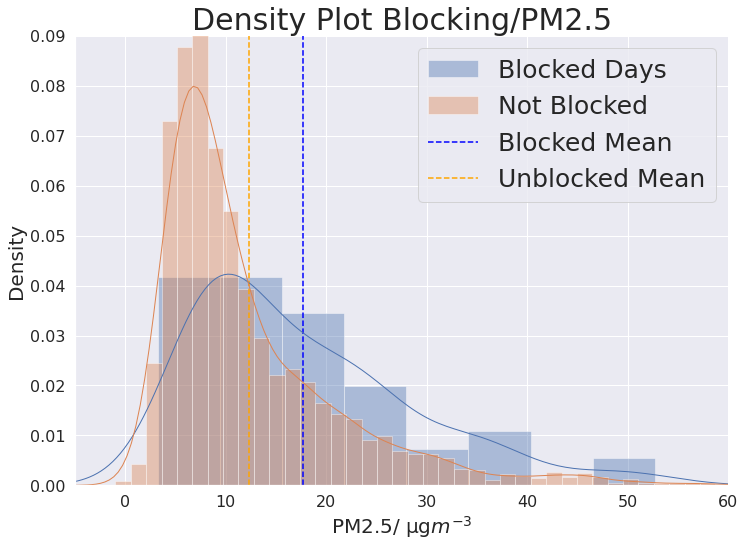

In [15]:
density_plot_PM(final_df,'All Stations (Urban) PM2.5','day_mean')


7.200783264419
12.523088641901726
16.772873230088493


/opt/jaspy/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jaspy/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jaspy/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

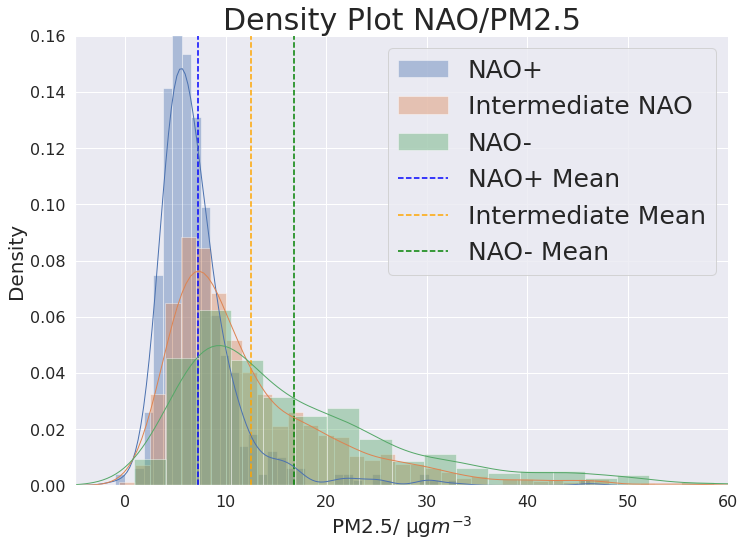

In [16]:
density_plot_PM_NAO(final_df.dropna(),'All Stations (Urban) PM2.5','day_mean')

In [28]:
print(np.percentile(final_df['day_mean'].dropna(),90))

24.75


In [29]:
final_df

,Date,lat,lon,day_mean,station_name,TM_90,NAO_PC
25,02-12-2016,52.4862,-1.8904,21.891667,Birmingham,0,-1.228157
26,03-12-2016,52.4862,-1.8904,11.445833,Birmingham,0,-1.031492
27,04-12-2016,52.4862,-1.8904,14.491667,Birmingham,0,-0.963764
28,05-12-2016,52.4862,-1.8904,44.416667,Birmingham,0,-0.903836
29,06-12-2016,52.4862,-1.8904,45.237500,Birmingham,0,-0.622052
...,...,...,...,...,...,...,...
14303,27-12-2017,53.4808,-2.2426,4.808333,Manchester,0,0.440512
14304,28-12-2017,53.4808,-2.2426,7.541667,Manchester,0,0.601481
14305,29-12-2017,53.4808,-2.2426,7.195833,Manchester,0,0.912424
14306,30-12-2017,53.4808,-2.2426,5.112500,Manchester,0,1.259903


In [43]:
df_1 = final_df[final_df.NAO_PC > 1]
df_0 = final_df[(final_df.NAO_PC>-1) & (final_df.NAO_PC< +1)]
df_11 = final_df[final_df.NAO_PC < -1]

In [44]:
print(len(df_1),len(df_0),len(df_11))

524 2450 565


In [99]:
df_19 = df_1[df_1.day_mean >24.75]
df_09 = df_0[df_0.day_mean >24.75]
df_119 = df_11[df_11.day_mean >24.75]

In [101]:
print(10*len(df_19)/len(df_1))
print(10*len(df_09)/len(df_0))
print(10*len(df_119)/len(df_11))

0.15267175572519084
0.9591836734693877
1.9115044247787611


In [16]:
df_blo = final_df[final_df.TM_90 == 1]
print(len(df_blo))

90


In [111]:
df_blo_90 = df_blo[df_blo.day_mean > 24.75]

In [113]:
print(len(df_blo_90)*10/len(df_blo))

2.2222222222222223


Observations

| PM2.5      | Data Points | % of Observations     |
| :---        |    :----:   |          ---: |
| NAO+     | 524       | 14.3%   |
| NAO-   | 565       | 16.0%      |
| Blocked   | 90        | 2.5%     |
| Air Quality Episodes   | 354        | 10%     |